In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Bernoulli NB: Implementation**

In [13]:
def fit(X,y):
  n_samples, n_features= X.shape
  class_count=np.unique(y)
  n_classes=len(class_count)

  w=np.zeros((n_classes,n_features), dtype=np.float64)
  w_priors=np.zeros(n_classes, dtype=np.float64)

  for c in range(n_classes):
    X_c=X[y==c]
    w[c,:]=np.sum(X_c, axis=0)/X_c.shape[0]

    w_priors[c]=X_c.shape[0]/float(n_samples)
  
  print("weight vector: \n",w)
  print('Prior: \n',w_priors)
  return w, w_priors

In [14]:
X=np.array([[1,0],[0,1],[0,1],[1,0]])
y=np.array([1,0,0,1])
fit(X,y)

weight vector: 
 [[0. 1.]
 [1. 0.]]
Prior: 
 [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

In [15]:
# filter example for class say class c=1
X_c=X[y==1]
X_c

array([[1, 0],
       [1, 0]])

In [16]:
# feature wise sum
np.sum(X_c,axis=0)

array([2, 0])

In [17]:
# divide by class count
w=np.sum(X_c,axis=0)/X_c.shape[0]
w

array([1., 0.])

In [18]:
# laplace correction

class BernoulliNB(object):
  def __init__(self, alpha=1.0):
    self.alpha=alpha
  def fit(self,X,y):
    n_samples, n_features=X.shape
    class_count=np.unique(y)
    n_classes=len(class_count)

    self.w=np.zeros((n_classes, n_features),dtype=np.float64)
    self.w_priors=np.zeros(n_classes, dtype=np.float64)

    for c in range(n_classes):
      X_c=X[y==c]
      self.w[c,:]=(np.sum(X_c,axis=0)+self.alpha)/(X_c.shape[0]+2*self.alpha)
      self.w_priors[c]=(X_c.shape[0]+self.alpha)/(float(n_samples)+n_classes*self.alpha)

    print('Class conditional density:\n',self.w)
    print('priors:\n',self.w_priors)
    return self.w, self.w_priors
  
  def log_likelihood_prior_prod(self,X):
    return X@(np.log(self.w).T)+(1-X)@np.log((1-self.w).T)+np.log(self.w_priors)
  
  def predict_proba(self,X):
    q=self.log_likelihood_prior_prod(X)
    return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)
  
  def predict(self,X):
    return np.argmax(self.log_likelihood_prior_prod(X), axis=1)


In [19]:
bernoulli_nb=BernoulliNB()
# X=np.array([[1,0],[0,0],[0,1],[1,0]])
# y=np.array([[1],[2],[2],[2]])/
bernoulli_nb.fit(X,y)

Class conditional density:
 [[0.25 0.75]
 [0.75 0.25]]
priors:
 [0.5 0.5]


(array([[0.25, 0.75],
        [0.75, 0.25]]), array([0.5, 0.5]))

In [20]:
bernoulli_nb.predict(X)

array([1, 0, 0, 1])

In [21]:
bernoulli_nb.log_likelihood_prior_prod(X)

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

In [22]:
bernoulli_nb.predict_proba(X)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

## **Multiclass classification setup**

In [23]:
X=np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y=np.array([1,0,0,1,2,2])

In [24]:
bernoulli_nb.fit(X,y)

Class conditional density:
 [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
priors:
 [0.33333333 0.33333333 0.33333333]


(array([[0.25, 0.75],
        [0.75, 0.25],
        [0.75, 0.75]]), array([0.33333333, 0.33333333, 0.33333333]))

In [25]:
bernoulli_nb.predict(X)

array([1, 0, 0, 1, 2, 2])

In [26]:
bernoulli_nb.predict_proba(X)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

# **Gaussian Naive Bayes**

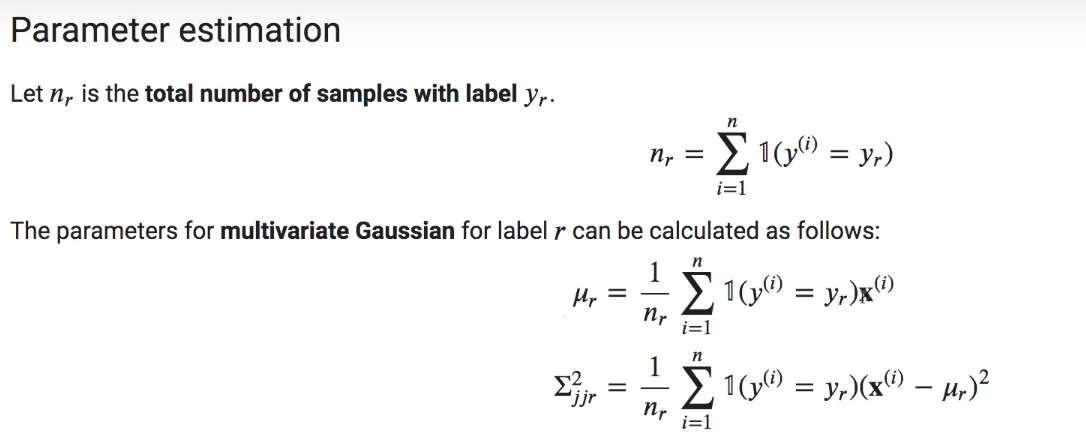

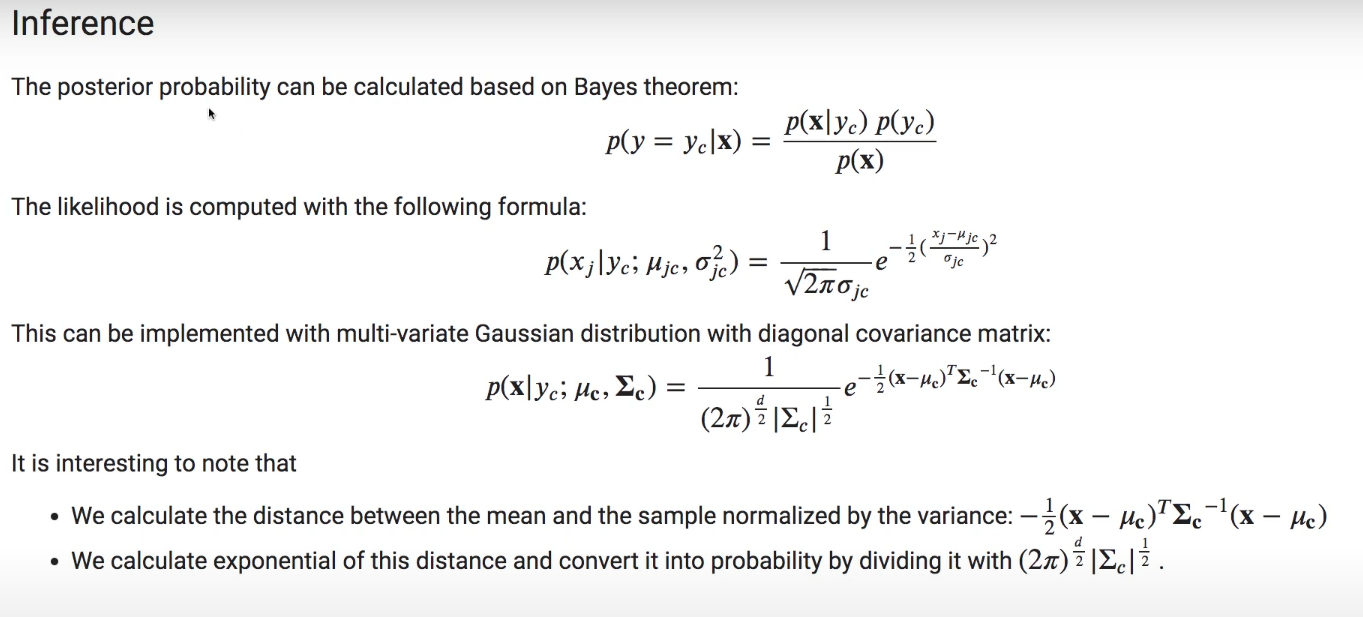

In [ ]:
class GaussianNB(object):
  def fit(self, X,y):
    n_samples, n_features=X.shape
    self._classes=np.unique(y)
    n_classes=len(self._classes)

    self._mean=np.zeros((n_classes, n_features),dtype=np.float64)
    self._var=np.zeros((n_classes, n_features),dtype=np.float64)
    self._priors=np.zeros(n_classes, dtype=np.float64)

    for idx,c in enumerate(self._classes):
      X_c=X[y==c]

      self._mean[idx,:]=X_c.mean(axis=0)
      self._var[idx,:]=X_c.var(axis=0)

      self._priors[idx]= X_c.shape[0]/float(n_samples)
    print("Mean: \n", self._mean)
    print('Variance:\n', self._var)
    print('priors:\n',self._priors)
    
  
  def _calc_pdf(self,class_idx,X):
    mean=self._mean[class_idx]
    var=np.diag(self._var[class_idx])
    z=np.power(2*np.pi, X.shape[0]/2)*np.power(np.linalg.det(var),1/2)
    return (1/z)*np.exp(-(1/2)*(X-mean).T@(np.linalg.inv(var))@(X-mean))

  def _calc_prod_likelihood_prior(self, X):
    self._prod_likelihood_prior=np.zeros((X.shape[0],len(self._classes)),
                                         dtype=np.float64)
    for x_idx, x in enumerate (X):
      for idx, c in enumerate(self._classes):
        self._prod_likelihood_prior[x_idx, c]=(
            np.log(self._calc_pdf(idx,x))+np.log(self._priors[idx])
        )
  def predict(self, X):
    self._calc_prod_likelihood_prior(X)
    return np.argmax(self._prod_likelihood_prior, axis=1)

  def predict_proba(self, X):
    self._calc_prod_likelihood_prior(X)
    return np.exp(self._prod_likelihood_prior)/np.expand_dims(
        np.sum(np.exp(self._prod_likelihood_prior),axis=1),axis=1
    )

## **Binary classification case**

In [ ]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

X,y=make_blobs(n_samples=100,
               n_features=2,
               centers=[[5,5],[10,10]],
               cluster_std=1.5,
               random_state=2)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=123)

In [ ]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)

In [ ]:
# Plotting the gaussian distributions

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots()
ax.scatter(X[:,0], X[:,1],c=y,s=50,cmap='RdBu')

xlim=(min(X[:,0])-2,max(X[:,0])+2)
ylim=(min(X[:,1])-2,max(X[:,1])+2)

xg=np.linspace(xlim[0],xlim[1],60)
yg=np.linspace(ylim[0],ylim[1],40)

xx,yy=np.meshgrid(xg,yg)

Xgrid=np.vstack([xx.ravel(),yy.ravel()]).T

for label, color in enumerate(['red','blue']):
  mask=(y==label)
  mu, std = X[mask].mean(0), X[mask].std(0)
  P=np.exp(-0.5*(Xgrid-mu)**2/std**2).prod(1)
  Pm=np.ma.masked_array(P,P<0.03)
  ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5, cmap=color.title()+'s')
  ax.contour(xx,yy,P.reshape(xx.shape),
             levels=[0.01,0.1,0.5,0.9],
             colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

plt.title('Gaussian Distribution of Data')
plt.show()

In [ ]:
gaussian_nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gaussian_nb.predict(X_test)))

In [ ]:
gaussian_nb.predict_proba(X_test)

In [ ]:
x_new=np.array([1.5,6.5])

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], marker='o', c=y, s=200, edgecolor='k', cmap='RdBu')

plt.scatter(x_new[0],x_new[1],marker='o',c='green',
            s=250, edgecolor='k',alpha=0.8)
plt.annotate('New Example',xy=x_new,
             xytext=(-30,120),textcoords='offset points',
             arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.show()

In [ ]:
gaussian_nb.predict_proba(np.array([x_new]))

## **Multiclass Classification case**

In [ ]:
X,y=make_blobs(n_samples=100,
               n_features=2,
               centers=[[5,5],[10,10],[20,20]],
               cluster_std=1.5,
               random_state=3)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=123)

In [ ]:
gaussian_nb_multiclass=GaussianNB()
gaussian_nb_multiclass.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, gaussian_nb_multiclass.predict(X_test)))

In [ ]:
gaussian_nb_multiclass.predict_proba(X_test)

# **Multinomial NB: Implementation**

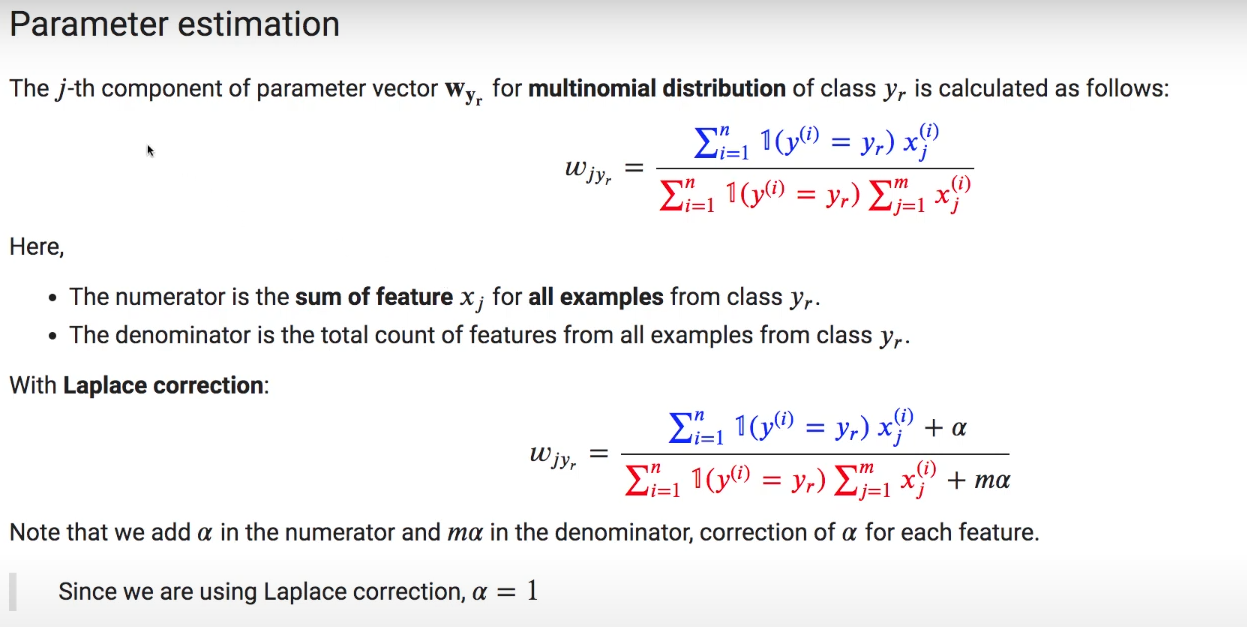

In [ ]:
class MultinomialNB(object):
  def fit(self, X,y, alpha=1):
    n_samples, n_features=X.shape
    self._classes=np.unique(y)
    n_classes=len(self._classes)

    self.w=np.zeros((n_samples, n_classes), dtype=np.float64)
    self.w_priors=np.zeros(n_samples, dtype=np.float64)

    for idx, c in enumerate(self._classes):
      X_c=X[y==c]
      total_count=np.sum(np.sum(X_c,axis=1)) # total count for c
      
      self.w[idx,:]=(np.sum(X_c, axis=0) + alpha)/(total_count + alpha * n_features)

      self.w_priors[idx]=(X_c.shape[0]+alpha)/float(n_samples + alpha * n_classes)

  def log_likelihood_prior_prod(self, X):
    return X@(np.log(self.w).T)+np.log(self.w_prior)

  def predict(self,X):
    return np.argmax(self.log_likelihood_prior_prod(X), axis=1)

  def predict_proba(self, X):
    q=self.log_likelihood_prior_prod(X)
    return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)


In [ ]:
multinomial_nb=MultinomialNB()

## **Binary setup**

In [ ]:
rng=np.random.RandomState(1)
X=rng.randint(5,size=(1000,5))
y=rng.randint(2,size=(1000,))

X_train, X_test, y_train, y_test= train_test_split(X,y)

print(X_train.shape)
print(y_train.shape)

In [ ]:
multinomial_nb.fit(X_train, y_train)